In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

from ipywidgets import interact

get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.titlesize'] = 8



In [2]:
# Functions

def normalize(src):
    return cv2.blur(src, ksize=(9,9))

def binary_threshold(src, low=70, high=255):
    _, binary = cv2.threshold(src, low, high, 0)
    return binary

def find_contours(binary):
    im2, contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_contours(src, contours):
    out = np.copy(src)
    
    if out.ndim == 2:
        out = np.dstack((out, out, out))
        
    cv2.drawContours(out, contours, -1, (0, 255, 0), 3)
    
    return out

def draw_ellipses(src, rect, ellipses):
    out = np.copy(src)
    
    if out.ndim == 2:
        out = np.dstack((out, out, out))
    
    for ellipse in ellipses:
        cv2.ellipse(out, ellipse, (255, 0, 0), 3)
    
    for rect in rects:
        print (rect )
        
    return out

def fit_ellipse(src):
    src = normalize(src)
    binary = binary_threshold(src)
    contours = find_contours(binary)
    
    ellipses = []
    rects = []
    for cnt in contours:
        rects.append(cv2.minAreaRect(cnt))
        if cnt.shape[0] > 5:
            ellipses.append(cv2.fitEllipse(cnt))
    return contours, rects, ellipses


((379.0, 216.5), (462.0, 431.0), -0.0)
((381.5, 224.5), (465.0, 447.0), -0.0)
((333.99993896484375, 176.49996948242188), (305.99993896484375, 350.99993896484375), -0.0)
((329.5, 27.0), (52.0, 175.0), -90.0)
((328.49993896484375, 224.49996948242188), (302.99993896484375, 446.99993896484375), -0.0)


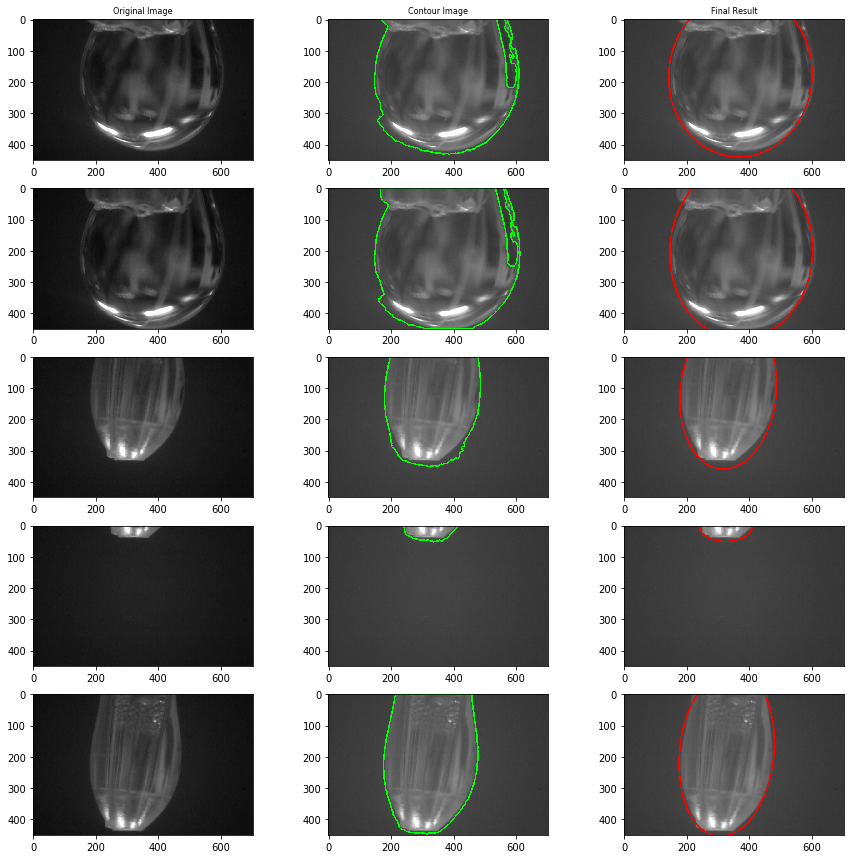

In [3]:
samples = [
           './samples/full_droplet_1.jpg', 
           './samples/full_droplet_2.jpg', 
           './samples/droplet_up_nolabel.jpg',
           './samples/pipette_tip_nolbl.jpg',
            './samples/imagex.jpg'
          ]

fig, axs = plt.subplots(len(samples), 3, figsize=(15, 15))
i = 0

for sample in samples:
    img = cv2.imread(sample, 0)
    img = img[30:, :]
    
    contours, rects, ellipses = fit_ellipse(img)
    contour_plt = draw_contours(img, contours)
    ellipse_plt = draw_ellipses(img, rects, ellipses)
    
    # Plot these images
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 1].imshow(contour_plt)
    axs[i, 2].imshow(ellipse_plt)
    
    if i == 0:
        axs[i, 0].set_title('Original Image')
        axs[i, 1].set_title('Contour Image')
        axs[i, 2].set_title('Final Result')
    
    i = i + 1

fig.savefig('ellipse_fit.jpg')
    